In [ ]:
words = open("names.txt", 'r').read().splitlines()
words[:10].

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
min(len(word) for word in words)

2

In [7]:
max(len(word) for word in words)

15

In [8]:
bigram_frequency = {}
for word in words[:3]:
    chars = ["<S>"] + list(word)+["<E>"]
    for ch, ch1 in zip(chars,chars[1:]):
        bigram = (ch,ch1)
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0)+1
        # print(ch, ch1)

bigram_frequency.items()

dict_items([(('<S>', 'e'), 1), (('e', 'm'), 1), (('m', 'm'), 1), (('m', 'a'), 1), (('a', '<E>'), 3), (('<S>', 'o'), 1), (('o', 'l'), 1), (('l', 'i'), 1), (('i', 'v'), 1), (('v', 'i'), 1), (('i', 'a'), 1), (('<S>', 'a'), 1), (('a', 'v'), 1), (('v', 'a'), 1)])

In [9]:
sorted(bigram_frequency.items(), key = lambda kv: -kv[1])

[(('a', '<E>'), 3),
 (('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('i', 'a'), 1),
 (('<S>', 'a'), 1),
 (('a', 'v'), 1),
 (('v', 'a'), 1)]

In [21]:
import torch
N = torch.zeros((27,27), dtype=torch.int32)
chars = sorted(list(set("".join(words))))
c2i = {c:i+1 for i,c in enumerate(chars)}
c2i["."]=0
c2i
i2c = {c:i for i,c in c2i.items()}
i2c

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

KeyError: 'x'

In [11]:
for word in words:
    chars = ["."] + list(word)+["."]
    for ch, ch1 in zip(chars,chars[1:]):
        ix = c2i[ch]
        iy = c2i[ch1]
        N[ix][iy]+=1 
        # bigram = (ch,ch1)
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

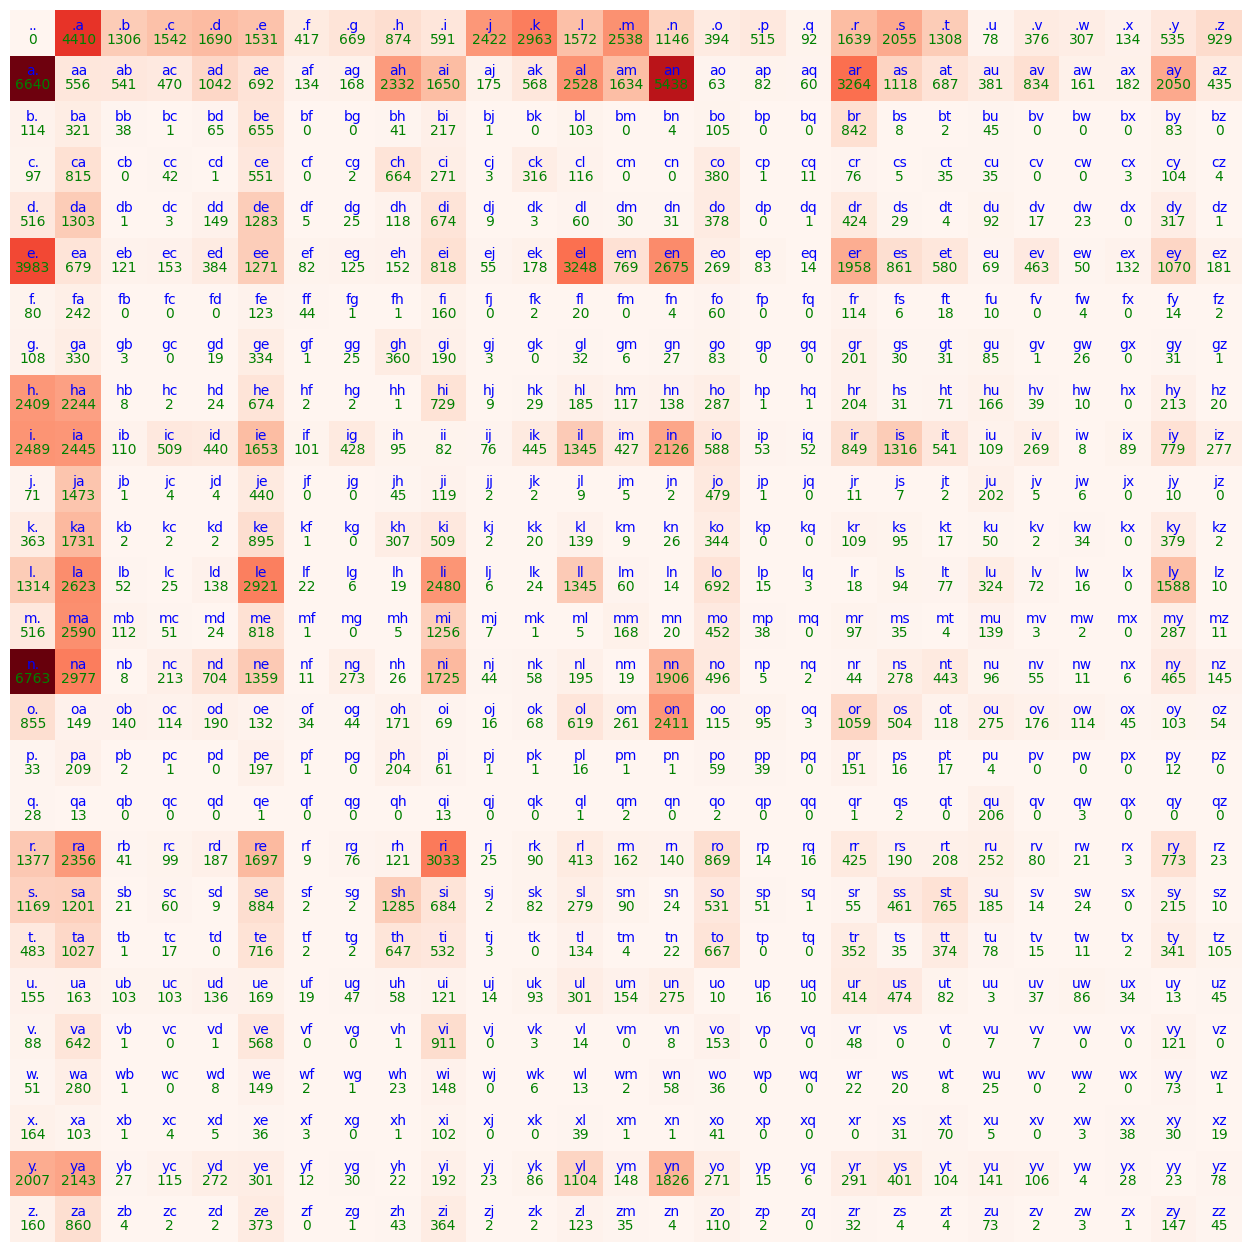

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,16))
plt.imshow(N, cmap="Reds")
for i in range(27):
    for j in range(27):
        # print(i,j)
        # print(i2c[i],i2c[j])
        char = i2c[i]+i2c[j]
        # print(N[i][j])
        plt.text(j,i,char, ha = "center", va = "bottom", color ="Blue")
        plt.text(j,i,N[i,j].item(), ha = "center", va = "top", color = "green")
plt.axis('off')

In [13]:
N[0]
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [14]:
# this looks good we have the probablities
# Now we want to sample characters based on the their probabaliites.
# It not like that is should take the most probabale one always (that make the probablities binary).
# the idea is that if i have to pick a character for 100 times, than the characters whose probabliy is less  
# should accur less frequently.

# torch.multinomial is a funtion which can output an index with frequecny proportioanl to its probabality
# but the seqence in which the index is given as output can be differnt, whcih we would want to be random

# let us leverage the torch multinomal and random funtions to sample


In [15]:
# this is a random generated sample probabality
# 3 now lets use torch.multinomial to generate indexes in the same frequency
import torch
g = torch.Generator().manual_seed(8732648)
random_numbers = torch.rand(3, generator =g)
probablity  = random_numbers/random_numbers.sum()
print(probablity)
index_smaple = torch.multinomial(probablity, num_samples = 100, replacement = True, generator = g)
torch.bincount(index_smaple)
# when we have sufficient sample, the claim of multinomial is true, for smaller sample it is diffcult to observe



tensor([0.6151, 0.1591, 0.2258])


tensor([61, 17, 22])

In [16]:
# now here we have probalities , and a sampling method of multinomial.
# now lets use this to sample the first charater
import torch
g = torch.Generator().manual_seed(8732648)
predited_char_index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
# N[predited_char_index]
# p = N[predited_char_index].float()
# p = p/p.sum()
# predited_char_index
i2c[predited_char_index]

'l'

In [17]:
# g = torch.Generator().manual_seed(8732648)
word = ""
for i in range(50):
    char_index = 0
    chars=[]
    while True:
        N[char_index]
        p = N[char_index].float()
        p = p/p.sum()
        # p = torch.ones(27)/27.0
        char_index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        char_index
        
        chars.append(i2c[char_index])
        if i2c[char_index]==".":
            break
    print("".join(chars))

#here names do not look very much name like
# to gave a feel of that karpath, replaces all the probablities with zeors, and shows, the names generated
# after that is evn more pathetic
# this also these probabaliies are the actual learning , the learning process


pemickha.
kuna.
kiararinnzenimaah.
ysh.
feledr.
a.
sshann.
se.
bulesziah.
ricadrimendrenidonn.
ja.
t.
onyraagetatarad.
hnoliny.
n.
beliy.
naia.
k.
m.
sza.
thlluleri.
ddaheikadadiarah.
haiselldien.
a.
ri.
brwe.
an.
miowan.
e.
milen.
cama.
nn.
luhaleka.
sendeamrix.
hahletnah.
kyzalasamaynatter.
anel.
len.
hadayammayn.
arde.
e.
ssh.
axs.
t.
ardann.
sassolahiynttora.
mabrydeielin.
kieaiyah.
dalycavylkyaa.
jeletisya.


In [18]:
# we are getting the pridiction and now we ant to measure the loss for each predition
# so given a name, i wish to predit , how likely would we get this name
# likelihood is basicly the probablity, with what probablity would the a pair occur together
# to calculate the likelihood of a name, we need to calculate the likelihood of each pair
# and then multiply them all together, 
# so likelihood of a name is the product of the likelihood of its pairs
# but then products of probablitis would be very small, hence to make is meaningful we take log
# since log gives negative value, we add a negative

# onew question is how does probabality tells us the error between predition and the and ground truth
# if the predition probabloty is very high it means, probablity is one so chances of error is very low
# if probablity is low, than chances of error is very high



### Now we will be doinng same thing using neural networks

In [276]:
# prepare the makemore dataste for neural network
# This is how i thin, we mush have an input (x) and known output (y) to prepare model
# and here our task is to predict the next charater, so in evary name the next character is the y value
words = open("names.txt", 'r').read().splitlines()
words[:10]

# we want each word to start and end with .
# we also want to print all the bigram for 
# first n number of words
xs = []
ys = []
for word in words:
    complete_word = "."+word+"."
    for char, char_next  in zip(complete_word,complete_word[1:]):
        
        # xs.append(char)
        # ys.append(char_next)
        # but we dont wan tthe charrates but the indexex
        idx_char = c2i[char]
        idx_char_next = c2i[char_next]
        xs.append(idx_char)
        ys.append(idx_char_next)
print(xs)
print(ys)

# but we woud rather use tensors instead of list of integer 
# here he also explain difference between , torch.Tensor and torch.tensor
# torch.Tensor is a more of a construtor
# torch should be used more often it is a factory funtion, it used .Tensor internaly
xs = torch.tensor(xs)
ys = torch.tensor(ys)





[0, 5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0, 9, 19, 1, 2, 5, 12, 12, 1, 0, 19, 15, 16, 8, 9, 1, 0, 3, 8, 1, 18, 12, 15, 20, 20, 5, 0, 13, 9, 1, 0, 1, 13, 5, 12, 9, 1, 0, 8, 1, 18, 16, 5, 18, 0, 5, 22, 5, 12, 25, 14, 0, 1, 2, 9, 7, 1, 9, 12, 0, 5, 13, 9, 12, 25, 0, 5, 12, 9, 26, 1, 2, 5, 20, 8, 0, 13, 9, 12, 1, 0, 5, 12, 12, 1, 0, 1, 22, 5, 18, 25, 0, 19, 15, 6, 9, 1, 0, 3, 1, 13, 9, 12, 1, 0, 1, 18, 9, 1, 0, 19, 3, 1, 18, 12, 5, 20, 20, 0, 22, 9, 3, 20, 15, 18, 9, 1, 0, 13, 1, 4, 9, 19, 15, 14, 0, 12, 21, 14, 1, 0, 7, 18, 1, 3, 5, 0, 3, 8, 12, 15, 5, 0, 16, 5, 14, 5, 12, 15, 16, 5, 0, 12, 1, 25, 12, 1, 0, 18, 9, 12, 5, 25, 0, 26, 15, 5, 25, 0, 14, 15, 18, 1, 0, 12, 9, 12, 25, 0, 5, 12, 5, 1, 14, 15, 18, 0, 8, 1, 14, 14, 1, 8, 0, 12, 9, 12, 12, 9, 1, 14, 0, 1, 4, 4, 9, 19, 15, 14, 0, 1, 21, 2, 18, 5, 25, 0, 5, 12, 12, 9, 5, 0, 19, 20, 5, 12, 12, 1, 0, 14, 1, 20, 1, 12, 9, 5, 0, 26, 15, 5, 0, 12, 5, 1, 8, 0, 8, 1, 26, 5, 12, 0, 22, 9, 15, 12, 5, 20, 0, 1, 21, 18, 15, 18, 1, 

In [184]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([228146, 27])

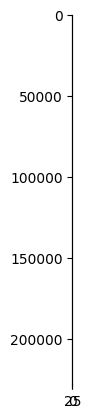

In [185]:
plt.imshow(xenc)

In [219]:
# now we will create a neuron layer, 
# so a neuron layer  has weiht dot product with input and bias
# we have input, now lets define the weights W
# first lets fix the dimantion , since each input is represnted by 27*1 dimention, 
# so each neuron will have 27*1
# each distinct feature is fed to one neuron, and we have 27 distinct features i.e. charaters
# so the layer will have 27*27 dimention


W = torch.rand((27,27)) 
# now lets take its dot product with input

xenc @ W



tensor([[0.1153, 0.7158, 0.6669,  ..., 0.1737, 0.3594, 0.5792],
        [0.6927, 0.0493, 0.6294,  ..., 0.0020, 0.3060, 0.3801],
        [0.0478, 0.5117, 0.7425,  ..., 0.4799, 0.9874, 0.0634],
        ...,
        [0.5489, 0.1017, 0.3155,  ..., 0.5928, 0.6744, 0.7977],
        [0.8517, 0.6673, 0.0625,  ..., 0.5645, 0.3139, 0.8796],
        [0.8354, 0.2472, 0.9675,  ..., 0.0596, 0.0928, 0.8943]])

In [199]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator= g, requires_grad = True)
xnex= F.one_hot(xs, num_classes=27).float()
logits = xenc @ W #log-counts
counts = logits.exp()# counts , equivalent to N matrix
probs = counts/counts.sum(1, keepdims = True)
probs
# above two line are basicly softmax operation
# probs
# loss = -probs[torch.arange(5),ys].log().mean()
# loss

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459]],
       grad_fn=<DivBackward0>)

In [250]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator= g, requires_grad = True)

In [254]:

xenc= F.one_hot(xs, num_classes=27).float()
logits = xenc @ W #log-counts
counts = logits.exp()# counts , equivalent to N matrix
probs = counts/counts.sum(1, keepdims = True)
probs.shape
probs[torch.arange(5),ys]
loss = -probs[torch.arange(5),ys].log().mean()
print(loss)

tensor(3.7492, grad_fn=<NegBackward0>)


In [252]:
W.grad=None
loss.backward()


In [253]:
W.data += -0.1*W.grad

In [242]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [272]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator= g, requires_grad = True)

In [273]:
# the output of multiplication are called logits, you can assume them like log of counts
#then we expontiate them to get back the value of count
# these things are being done for learning purpose i soppose, to make the numbers more usable

num = xs.nelement()
print(num)
print(ys.nelement())
for i in range(500):
    #forward pass
    xenc= F.one_hot(xs, num_classes=27).float()
    # print()
    logits = xenc @ W #log-counts
    counts = logits.exp()# counts , equivalent to N matrix
    probs = counts/counts.sum(1, keepdims = True)

    # above two line are basicly softmax operation
    print(probs.shape)
    
    loss = -probs[torch.arange(num),ys].log().mean()-0.01*(W**2).mean()
    print(loss.item())
    W.grad = None
    #backward pass
    loss.backward()
    W.data += -50*W.grad

228146
228146
torch.Size([228146, 27])
3.749288558959961
torch.Size([228146, 27])
3.363344430923462
torch.Size([228146, 27])
3.1469075679779053
torch.Size([228146, 27])
3.0134429931640625
torch.Size([228146, 27])
2.920790195465088
torch.Size([228146, 27])
2.8533968925476074
torch.Size([228146, 27])
2.8025999069213867
torch.Size([228146, 27])
2.7628283500671387
torch.Size([228146, 27])
2.7306370735168457
torch.Size([228146, 27])
2.703882932662964
torch.Size([228146, 27])
2.6811976432800293
torch.Size([228146, 27])
2.6616780757904053
torch.Size([228146, 27])
2.6447038650512695
torch.Size([228146, 27])
2.6298279762268066
torch.Size([228146, 27])
2.6167116165161133
torch.Size([228146, 27])
2.6050851345062256
torch.Size([228146, 27])
2.594729423522949
torch.Size([228146, 27])
2.5854618549346924
torch.Size([228146, 27])
2.5771284103393555
torch.Size([228146, 27])
2.5696001052856445
torch.Size([228146, 27])
2.5627694129943848
torch.Size([228146, 27])
2.556544303894043
torch.Size([228146, 27])

In [274]:
(W**2).mean()

tensor(4.8591, grad_fn=<MeanBackward0>)

In [275]:
# sampling from neural network
g = torch.Generator().manual_seed(2147483647)
for name_count in range(10):
    name = []
    ix = 0
    while True:
        
        

        xenc= F.one_hot(torch.tensor([ix]), num_classes=27).float()

        logits = xenc @ W #log-counts

        counts = logits.exp()# counts , equivalent to N matrix
        probs = counts/counts.sum(1, keepdims = True)

        # char = torch.multinomial(probs, num_samples = 1, replacement=True, generator=g)
        char_idx = torch.multinomial(probs, num_samples = 1, replacement=True, generator = g).item()
        char = i2c[char_idx]
        name.append(char)
        if char_idx ==0:
            break
    # print(name)
    print("".join(name))
    



cexbmkmjmlkmrkrcazktahkmkmjimjttainrlkaakzkatdakskmztpbbjtbhrmgmtasmmczjmdckjkjkwptedajkkjemkmmsadsyenkavgjnyrftbspmhgcjdgbvtahlasckdsdrdbajjglhpyawaisanjjrpfdnrjkazkmkdesjjfarmttgbckajbhaabsaathrkmcslqevmcmabrmcaahrkjecaxmaldkmlmtjavjzscblmysoehlbptjapmdeagpschacfkeatksillmvlbhmijjmdezhsamjhkamcxmmmkcasbcrfmbalcsahrcjmrckasvzasezazemnsckckcrnkajascyvtamiskkddagnkclrbjwycajzeaclajkacmutstomckzadbajrddbmkahmdcvhfacdvaaaajajkdjsghkcrdklhamrlrklmlcmgroapnaaaydaenkaacgosflramemjdkclfdtirskjpjjdahzymalerzalmzjbtjrtfjsobcnkcajkvsmjaacrekmoradmlveimtacaamnefsmhmemkwobssajajkkskrcparmrxskfkkmjscymndmkcdswamcrzcansjdndszakckedaegzzklhnadqnosivkdrnkjsmtthtajkmdsjrstjtaaledjkjasjkcdrzsrcagajajcvkcjammkavpllcikskbahjenvcajkemadkdaddjwdaamfmclmrmoljlpjldkjeaaerjpksmkzahrmmtoadmsmdcdnkaaomtzfkkedeadjhbmmjkajhlkedjslkezaisndkoatiycrdfetiakvzlzfauamckndsmjldsbkcylrodgmkjgftrahdrnjapspdaknakahavseelvladcjadabgmanzadakamaykmkbhjjkokkjkaabcsajdzcbclmzguhbcdetjmrtascppbadpbdsyrcdkkcodaedjaaajrrviiaaynlldb

tensor([[ 8.1476e-01,  1.7692e+00, -1.5698e-01, -8.2462e-01, -7.6880e-01,
         -4.9059e-01, -3.2009e-02, -4.5656e-01, -1.1958e+00,  1.3501e+00,
         -8.8127e-01, -8.7237e-01,  1.2820e-01, -1.1762e+00,  9.5453e-02,
         -1.9704e+00, -1.7278e+00, -9.5686e-01,  8.1176e-01, -5.2647e-01,
          1.0824e+00, -7.1105e-01,  2.7430e-01,  1.5187e+00,  1.1067e+00,
          5.7422e-01,  1.1914e-01],
        [ 1.5844e-01, -1.9478e+00,  1.1350e+00, -6.1749e-01, -4.0899e-01,
         -1.3655e+00,  2.7843e-01,  3.6197e-01,  1.2433e-01,  3.4078e-01,
          1.9722e+00, -4.7392e-01, -1.1519e+00, -2.5821e+00, -2.3558e+00,
          2.2590e-01,  1.3048e+00, -1.1400e+00,  1.4404e+00,  9.5352e-01,
          2.0187e+00, -1.4310e+00, -1.3007e+00, -8.8470e-01, -3.4270e-01,
          6.3756e-01, -1.0961e+00],
        [-1.6224e+00, -1.0015e+00, -3.6698e-02, -3.9377e-01, -1.5470e+00,
         -4.3251e-01,  1.2866e+00, -4.8944e-01, -1.8373e+00, -2.5605e-01,
         -9.1673e-02,  5.1895e-01,  1.65